Simulation stopped at iteration 2 because the price became negative.


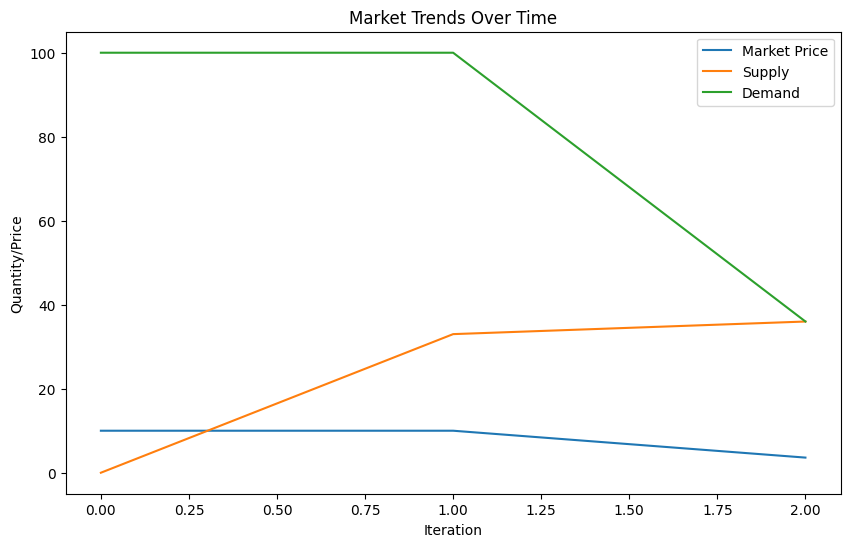

In [35]:
def simulate_market(num_agents, initial_price, initial_budgets, initial_capacities, num_iterations):
    consumers = [Consumer(budget) for budget in initial_budgets]
    producers = [Producer(capacity, np.random.uniform(1, 5)) for capacity in initial_capacities]

    prices = [initial_price]
    supplies = [sum(p.inventory for p in producers)]
    demands = [sum(c.buy(prices[-1]) for c in consumers)]

    for iteration in range(num_iterations):
        # Update producers
        for producer in producers:
            producer.produce()

        # Calculate total supply and demand
        total_supply = sum(p.inventory for p in producers)
        total_demand = sum(c.buy(prices[-1]) for c in consumers)

        # Update market price based on supply and demand
        new_price = prices[-1] + 0.1 * (total_demand - total_supply)

        # Check if the new price is negative and stop the simulation
        if new_price < 0:
            print(f"Simulation stopped at iteration {iteration} because the price became negative.")
            break

        prices.append(new_price)

        # Update consumers and producers based on transactions at the determined price
        revenue = sum(p.sell(prices[-1]) for p in producers)
        total_consumed = sum(c.buy(prices[-1]) for c in consumers)

        # Update supplies and demands
        supplies.append(total_supply - total_consumed)
        demands.append(total_demand)

    return prices, supplies, demands

# Example usage:
num_agents = 100
initial_price = 10
initial_budgets = np.random.uniform(20, 50, num_agents)
initial_capacities = np.random.randint(1, 10, num_agents)
num_iterations = 50

prices, supplies, demands = simulate_market(num_agents, initial_price, initial_budgets, initial_capacities, num_iterations)

# Plotting market trends using plt.plot
plt.figure(figsize=(10, 6))
plt.plot(range(len(prices)), prices, label='Market Price')
plt.plot(range(len(supplies)), supplies, label='Supply')
plt.plot(range(len(demands)), demands, label='Demand')

plt.xlabel('Iteration')
plt.ylabel('Quantity/Price')
plt.title('Market Trends Over Time')
plt.legend()
plt.show()